# Network features and questions 

Here we aim to use network science techniques to answer our questions about politics and voting patterns. The network construction was realized in the two previous notebooks. 

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

import matplotlib.pyplot as plt
import seaborn as sns

import time
from tqdm.notebook import trange, tqdm
import json

import sys  
sys.path.insert(0, '../pyscripts/')

from prepare_adjacency_matrix import GraphConstruction

## Notebook settings

Below we define some things important all over the notebook. 

In [12]:
party_color = {'PT': '#CC0000', 'PSL': '#008000', 'PL': '#0F0073', 'PP': '#7DC9FF',
               'PSDB': '#0080FF', 'PSD':'#FFA500', 'MDB': '#30914D', 'REPUBLICANOS': '#005DAA', 
               'PSB': '#FFCC00', 'DEM': '#8CC63E', 'PDT': '#FF0000', 'SOLIDARIEDADE': '#FF9C2B', 
               'PROS': '#FF5460', 'PODE': '#2DA933', 'PTB': '#7B7B7B', 'PSC': '#009118', 
               'PSOL': '#700000', 'PCdoB': '#A30000', 'CIDADANIA': '#EC008C', 'AVANTE': '#ED5F36', 
               'NOVO': '#FF4D00', 'PATRIOTA': '#00A29B', 'PV': '#006600', 'REDE': '#379E8D', 
               'S.PART.': '#DDDDDD', 'PR': '#0F0073', 'PRB': '#005DAA', 'PATRI': '#00A29B', 
               'PHS': 'black', 'PPS': '#EC008C', 'PPL': 'black', 'PRTB': 'black', 'PRP': 'black',
               'PMDB': '#30914D', 'PP**': "#7DC9FF", 'SDD': '#FF9C2B', 'PMN': 'black', 'PTdoB': '#ED5F36',
               'PTC': 'black', 'PFL': '#8CC63E', 'PL*': '#0F0073', 'PEN': '#00A29B','PSDC': 'black'
              }

region_color = {'Norte': '#08FB74', 'Nordeste': '#FA9A14', 'Sudeste': '#6E30FF', 
                'Sul': '#E61C38', 'Centro-oeste': '#D7E307'}

sns.set()

We have prepared all the necessary data to help the construction in this notebook. 

In [14]:
graphConstrutor = GraphConstruction()

legislature = 56
adjacency_matrix = graphConstrutor.import_adjacency_matrix(legislature, 'same', 'same')
G = graphConstrutor.build_graph_threshold(adjacency_matrix, threshold = 0.95, legislature = legislature)

Below we see the first metric that ponders each voting with if the deputies agree, and 0 otherwise. 

In [15]:
# Removing the zero-degree deputies. 
remove = [node for node,degree in dict(G.degree()).items() if degree < 1]
G.remove_nodes_from(remove)

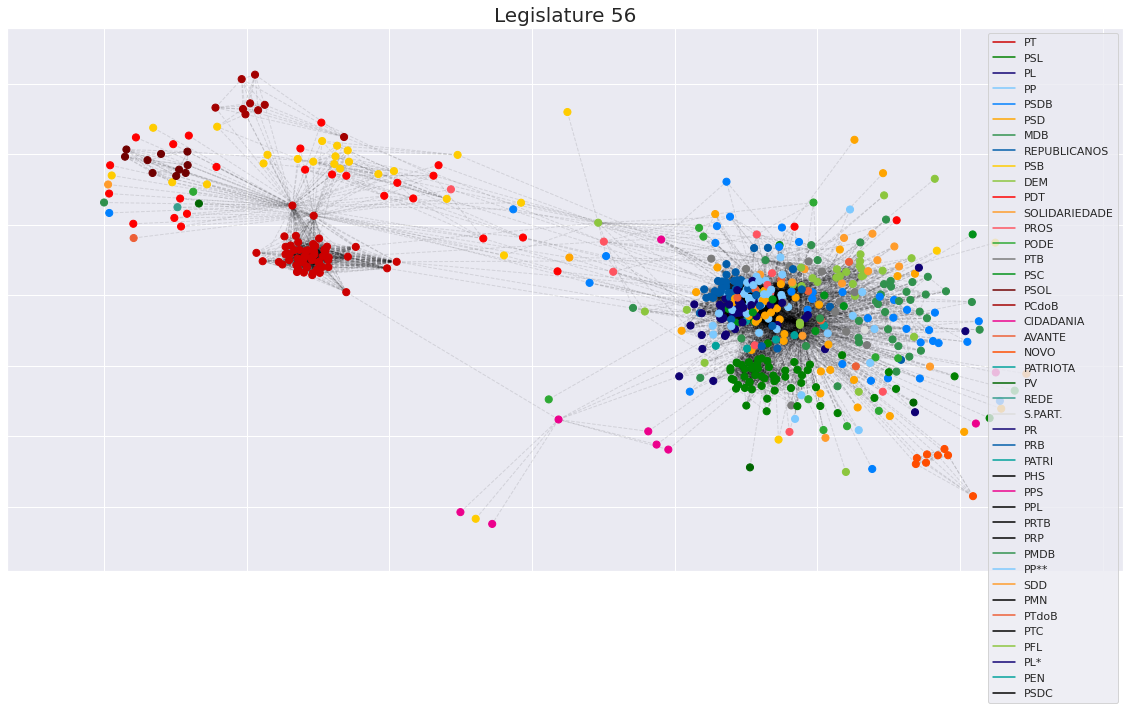

In [17]:
# Setting up colors 
colors = [party_color[G.nodes[n]['party']] for n in G.nodes]

fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size = 50, node_color = colors, ax = ax)
nx.draw_networkx_edges(G, pos=pos, edge_color='black', style='dashed',alpha =0.1, ax = ax)

for label,color in party_color.items():
    ax.plot([0],[0], color=color, label=label)

ax.legend()
plt.title('Legislature 56', fontsize = 20)
plt.show()

In [18]:
#c = greedy_modularity_communities(G)

In [ ]:
c = nx.algorithms.community.modularity_max.greedy_modularity_communities

In [107]:
communities = {i:0 for i in c[0]}
communities.update({i:1 for i in c[1]})

community_color = {0: 'blue', 1: 'red'}

In [106]:
nx.set_node_attributes(G, communities, 'comunity')

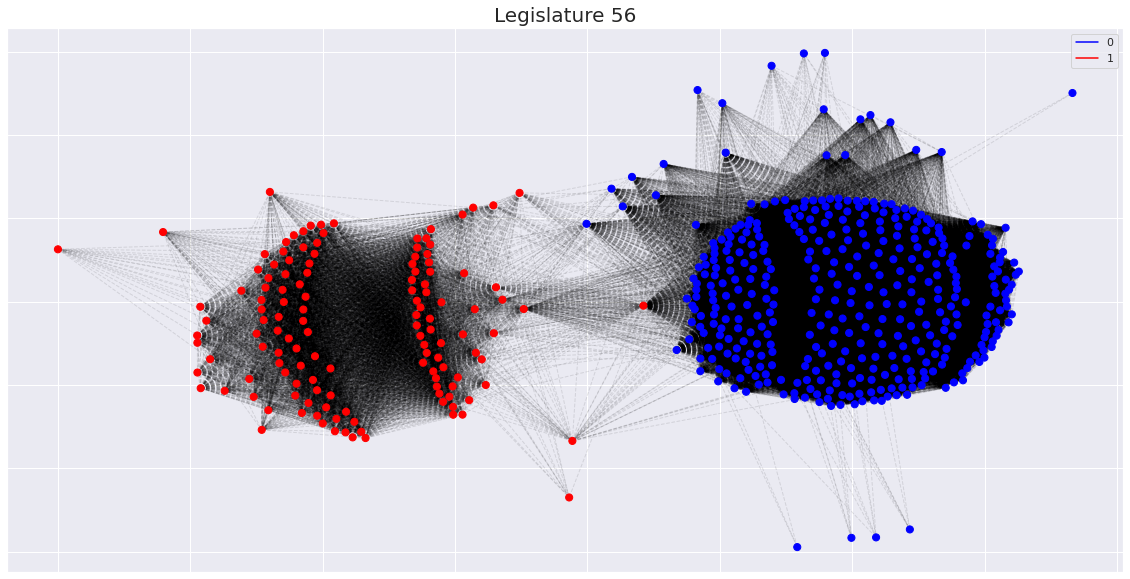

In [108]:
# Removing the zero-degree deputies. 
remove = [node for node,degree in dict(G.degree()).items() if degree < 1]
G.remove_nodes_from(remove)

# Setting up colors 
colors = [community_color[G.nodes[n]['comunity']] for n in G.nodes]

fig, ax = plt.subplots(figsize=(20,10))

pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size = 50, node_color = colors, ax = ax)
nx.draw_networkx_edges(G, pos=pos, edge_color='black', style='dashed',alpha =0.1, ax = ax)

for label,color in community_color.items():
    ax.plot([0],[0], color=color, label=label)

ax.legend()
plt.title('Legislature 56', fontsize = 20)
plt.show()

We can also verify a way of building not considering the threshold. In this case, we link the deputy with the highest correlation in its line. Therefore, we will see a lot of one-degree nodes. 

In [72]:
adjacency_matrix = graphConstrutor.import_adjacency_matrix(legislature, 'same', 'same')

In [73]:
G = nx.from_pandas_adjacency(df = 1*(adjacency_matrix == adjacency_matrix.max(axis = 1)))

deputies = pd.read_csv('../data/tables/deputies.csv', index_col = 0)

parties = dict(zip(deputies[deputies.idLegislatura==legislature].id.astype(int), 
                   deputies[deputies.idLegislatura==legislature].siglaPartido))
uf = dict(zip(deputies[deputies.idLegislatura==legislature].id.astype(int), 
              deputies[deputies.idLegislatura==legislature].siglaUf))
region = dict(zip(deputies[deputies.idLegislatura==legislature].id.astype(int), 
                  deputies[deputies.idLegislatura==legislature].region))
names = dict(zip(deputies[deputies.idLegislatura==legislature].id.astype(int), 
                 deputies[deputies.idLegislatura==legislature].nome))

nx.set_node_attributes(G, parties, 'party')
nx.set_node_attributes(G, uf, 'uf')
nx.set_node_attributes(G, region, 'region')
nx.set_node_attributes(G, names, 'names')

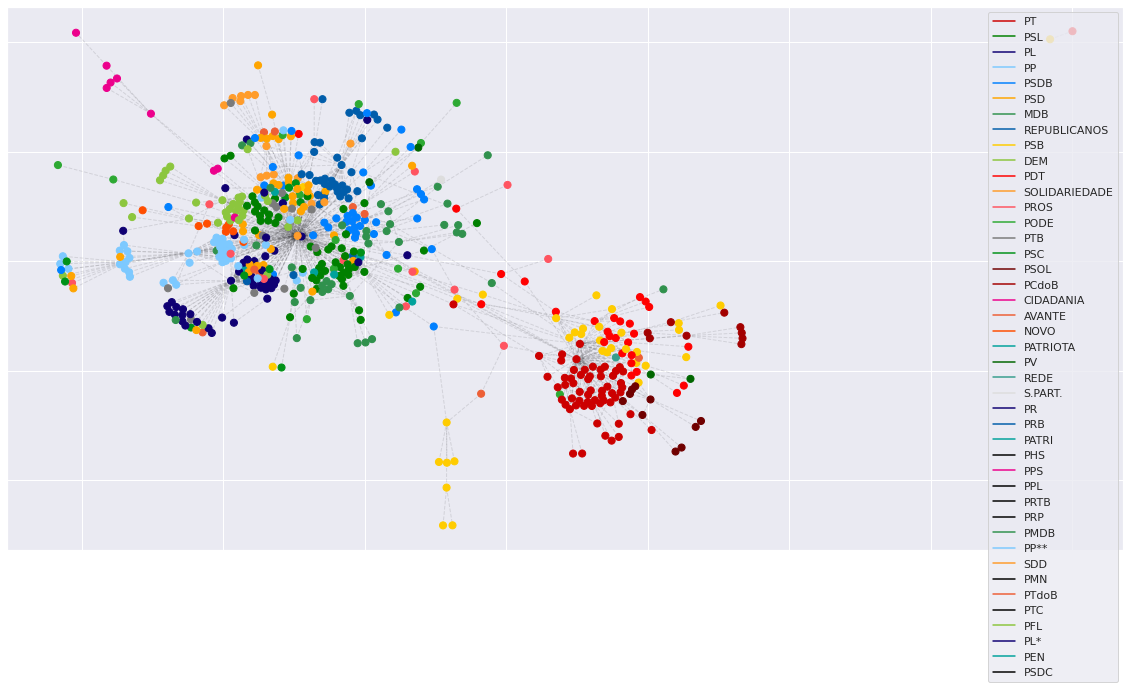

In [13]:
# Removing the zero-degree deputies. 
remove = [node for node,degree in dict(G.degree()).items() if degree < 1]
G.remove_nodes_from(remove)

# Setting up colors 
colors = [party_color[G.nodes[n]['party']] for n in G.nodes]

fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size = 50, node_color = colors, ax = ax)
nx.draw_networkx_edges(G, pos=pos, edge_color='black', style='dashed',alpha =0.1, ax = ax)

for label,color in party_color.items():
    ax.plot([0],[0], color=color, label=label)

ax.legend()
plt.show()

Text(0.5, 1.0, 'Degree distribution legislature 56: option 2')

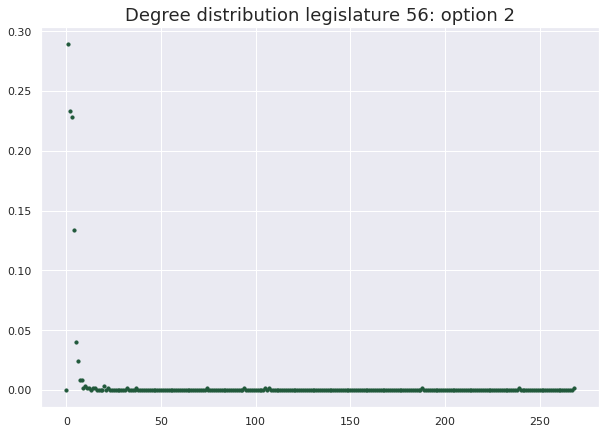

In [74]:
fig, ax = plt.subplots(figsize=(10,7))

degrees = nx.degree_histogram(G)
x = range(len(degrees))
y = [z/float(sum(degrees)) for z in degrees]

ax.scatter(x,y,s=10,color = "#21593b")

ax.set_title('Degree distribution legislature 56: option 2', fontsize = 18)

## Centrality algorithms 

In the following, we use some centrality metrics and algorithms to the network.

In [24]:
legislature = 56
adjacency_matrix = graphConstrutor.import_adjacency_matrix(legislature, 'partial-unknown', 'against')
G = graphConstrutor.build_graph_threshold(adjacency_matrix, threshold = 0.2, legislature = legislature)

authorities = sorted(nx.hits(G)[1].items(), key = lambda x: x[1], reverse = True)